# Preparations for public lecture: Data is

_(Created by Nicholas Zufelt)_

This notebook contains the code needed to generate some of the data and visualizations used in a public presentation called [Data is](https://github.com/nzufelt/data_is), presented at Phillips Academy on January 23, 2020.




In [0]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textwrap import fill # taken from https://stackoverflow.com/questions/47057789/matplotlib-wrap-text-in-legend
from statistics import mean, median, stdev

plt.style.use('fivethirtyeight')

#### Chart 1: young people and climate change
Data source: [Gallup Poll](https://news.gallup.com/poll/234314/global-warming-age-gap-younger-americans-worried.aspx)

In [0]:
title = "Americans' Attitudes About Global Warming, by Age"

# Text taken directly from website (thanks, Gallup, for making it tab delimited!)
text = """18 to 34 	35 to 54 	55 and older 	Age gap (18 to 34 minus 55+)
Think global warming will pose a serious threat in your lifetime 	51 	47 	29 	22
Think global warming is caused by human activities 	75 	62 	55 	20
Think problem of global warming is underestimated in the news 	48 	38 	31 	17
Think most scientists believe global warming is occurring 	73 	69 	58 	15
Worry a great deal/fair amount about global warming 	70 	63 	56 	14
Think effects of global warming already begun 	62 	63 	54 	8
Understand global warming issue very/fairly well 	82 	80 	76 	6
"""

# Found this solution online: https://stackoverflow.com/questions/22604564/create-pandas-dataframe-from-a-string
df = pd.read_csv(io.StringIO(text), sep='\t')
df

,18 to 34,35 to 54,55 and older,Age gap (18 to 34 minus 55+)
Think global warming will pose a serious threat in your lifetime,51,47,29,22
Think global warming is caused by human activities,75,62,55,20
Think problem of global warming is underestimated in the news,48,38,31,17
Think most scientists believe global warming is occurring,73,69,58,15
Worry a great deal/fair amount about global warming,70,63,56,14
Think effects of global warming already begun,62,63,54,8
Understand global warming issue very/fairly well,82,80,76,6


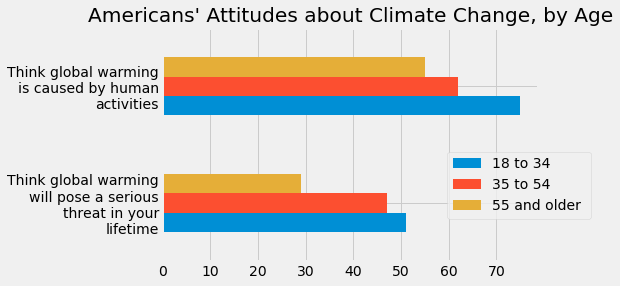

In [0]:
# indices
serious_threat = df.iloc[0].name
news = df.iloc[2].name
columns = df.columns[:3]

# data
sliced = df.iloc[0:2][columns]

# plot
sliced.plot(kind="barh")
plt.title("Americans' Attitudes about Climate Change, by Age")
labels = [fill(l, 20) for l in sliced.index]
plt.yticks([0,1], labels)
plt.legend(loc='upper center', bbox_to_anchor=(0.95, 0.5), ncol=1)

plt.show()

#### Exercise 2: Two Neighborhoods

The main goal of this exercise is to show some (fabricated) data in order to have discussions about responsibility and the use and subjectivity of data practices.

In [0]:
data = [[27_100, 17_230, 15_600, 48_150, 22_175, 83_210, 32_700, 23_250, 48_080, 33_220],
        [32_210, 41_350, 45_030, 29_220, 28_150, 34_340, 35_780, 36_210, 35_040, 32_710]]

print(mean(data[0]), median(data[0]))
print(mean(data[1]), median(data[1]))

35071.5 29900.0
35004 34690.0


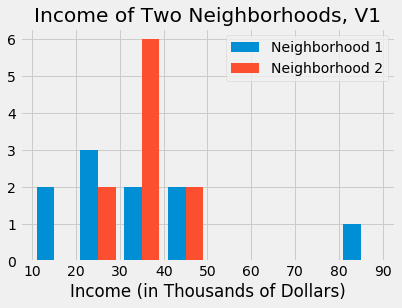

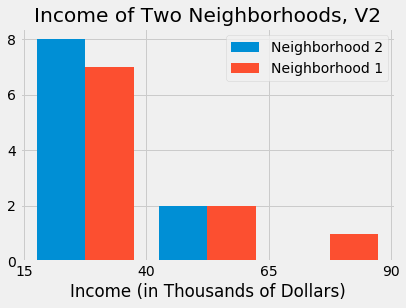

In [0]:
# plot 1
bins1 = [10_000, 20_000, 30_000, 40_000, 50_000, 60_000, 70_000, 80_000, 90_000]

plt.hist(data, bins=bins1)
plt.title("Income of Two Neighborhoods, V1")
plt.xlabel("Income (in Thousands of Dollars)")
plt.xticks(bins1, [x // 1000 for x in bins1])
plt.legend(["Neighborhood 1", "Neighborhood 2"])
plt.show()

# plot 2
bins2 = [15_000, 40_000, 65_000, 90_000]
reversed_data = [data[1],data[0]]

plt.hist(reversed_data, bins=bins2)
plt.title("Income of Two Neighborhoods, V2")
plt.xlabel("Income (in Thousands of Dollars)")
plt.xticks(bins2, [x // 1000 for x in bins2])
plt.legend(["Neighborhood 2", "Neighborhood 1"])
plt.show()

In [0]:
# Used to copy the data into Excel so I can get a pretty screenshot for my slides
df = pd.DataFrame(data=np.array(data).T, columns=["Neighborhood 1", "Neighborhood 2"])
df

,Neighborhood 1,Neighborhood 2
0,27100,32210
1,17230,41350
2,15600,45030
3,48150,29220
4,22175,28150
5,83210,34340
6,32700,35780
7,23250,36210
8,48080,35040
9,33220,32710
